# This code does a basic description of CTL materials

In [1]:
import pickle
import pandas as pd

with open('data_RO1/df_all_ctls.pkl', 'rb') as f:
    df_all_ctls = pickle.load(f)

In [2]:
df_all_ctls

,etl,htl,ref
0,"[PCBM-60, LiF]","[PEDOT:PSS, PDPP-DTT]",https://doi.org/10.1038/NPHOTON.2014.284
1,"[PCBM-60, Bphen]",[PEDOT:PSS],https://doi.org/10.1016/j.orgel.2019.105430
2,"[TiO2-c, TiO2-mp]",[none],https://doi.org/10.1021/ja307789s
3,"[PCBM-60, Bphen]",[PEDOT:PSS],https://doi.org/10.1016/j.electacta.2018.07.029
4,[TiO2-c],[MeO-PheDOT],https://doi.org/10.1002/asia.201501423
...,...,...,...
43103,"[TiO2-c, TiO2-mp]",[Spiro-MeOTAD],https://doi.org/10.1049/mnl.2017.0876
43104,"[ZnO-c, ZnO-nw]",[Spiro-MeOTAD],https://doi.org/10.1088/0256-307X/32/7/078401
43105,"[PCBM-60, BCP]",[PEDOT:PSS],https://doi.org/10.1039/c6nr08375g
43106,[SnO2-c],[Spiro-MeOTAD],https://doi.org/10.1002/advs.201700031


In [3]:
# Change some lists that are separated with ";" lists into proper lists
for index, _ in df_all_ctls.iterrows():
    i = 0
    while i < len(df_all_ctls.at[index, "etl"]):
        if ";" in df_all_ctls.at[index, "etl"][i]:
            elements = df_all_ctls.at[index, "etl"][i].split(";")
            df_all_ctls.at[index, "etl"] = df_all_ctls.at[index, "etl"][:i] + elements + df_all_ctls.at[index, "etl"][i+1:]
        i += 1
        
for index, _ in df_all_ctls.iterrows():
    i = 0
    while i < len(df_all_ctls.at[index, "htl"]):
        if ";" in df_all_ctls.at[index, "htl"][i]:
            elements = df_all_ctls.at[index, "htl"][i].split(";")
            df_all_ctls.at[index, "htl"] = df_all_ctls.at[index, "htl"][:i] + elements + df_all_ctls.at[index, "htl"][i+1:]
        i += 1

In [4]:
# Get the count of each material in 'etl' column
etl_material_counts = df_all_ctls['etl'].apply(pd.Series).stack().value_counts()

# Get the count of each material in 'htl' column
htl_material_counts = df_all_ctls['htl'].apply(pd.Series).stack().value_counts()

In [5]:
print(etl_material_counts)
#.head(20))
#print(etl_material_counts.tail(10))

TiO2-c                                  22083
TiO2-mp                                 13401
PCBM-60                                 10455
BCP                                      5613
C60                                      3908
                                        ...  
EPA                                         1
bis-PCBOE                                   1
HTAB                                        1
Graphene nanoribbons hPDI3-Pyr-hPDI3        1
DEME-BF4                                    1
Length: 921, dtype: int64


In [6]:
print(htl_material_counts)

Spiro-MeOTAD     21739
PEDOT:PSS         7318
none              2626
PTAA              2323
NiO-c             1975
                 ...  
TTB3                 1
TAZ-[MeOTPA]2        1
Cu:NiO               1
Benzylamine          1
DPP-Ome              1
Length: 1731, dtype: int64


In [7]:
# materials counts

print(f'etl_materials including duplicates: {etl_material_counts.sum()}')
print(f'htl_materials including duplicates: {htl_material_counts.sum()}')

print(f'Unique etl materials: {len(etl_material_counts)}')
print(f'Unique htl materials: {len(htl_material_counts)}')

# stack counts
etl_stack_count = df_all_ctls['etl'].value_counts()
print(f'Number of unique etl stacks: {len(etl_stack_count)}')
htl_stack_count = df_all_ctls['htl'].value_counts()
print(f'Number of unique htl stacks: {len(htl_stack_count)}')
#unique_stacks = set(df_all_ctls['etl'] + df_all_ctls['htl'])
#print(f'Number of total unique stacks: {len(unique_stacks)}')

print(f'Total non-unique materials: {len(etl_material_counts)+len(htl_material_counts)}')
print(f'Total unique materials: {len(etl_material_counts+htl_material_counts)}')

unique_materials = set(df_all_ctls['etl'].sum() + df_all_ctls['htl'].sum())
print(len(unique_materials))

etl_materials including duplicates: 72993
htl_materials including duplicates: 45805
Unique etl materials: 921
Unique htl materials: 1731
Number of unique etl stacks: 1463
Number of unique htl stacks: 1973
Total non-unique materials: 2652
Total unique materials: 2534
2534


# Plots for the most frequently used stacks

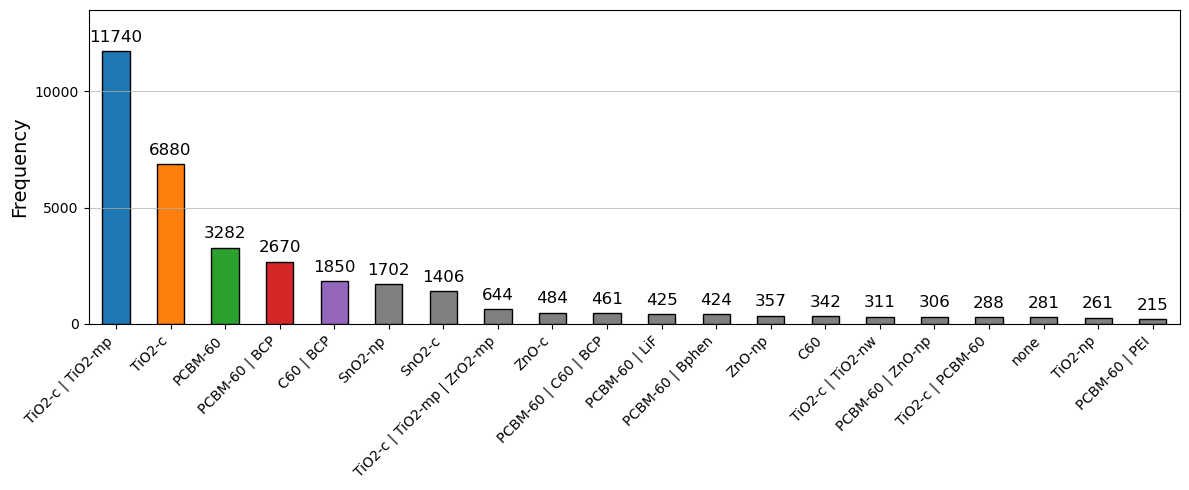

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

top_20_etl = df_all_ctls['etl'].value_counts().head(20)

colors = []
for category in top_20_etl.index:
    if category == ['TiO2-c', 'TiO2-mp']:
        colors.append('tab:blue')
    elif category == ['TiO2-c']:
        colors.append('tab:orange')
    elif category == ['PCBM-60', 'BCP']:
        colors.append('tab:red')
    elif category == ['PCBM-60']:
        colors.append('tab:green')
    elif category == ['C60', 'BCP']:
        colors.append('tab:purple')
    else:
        colors.append('grey')

ax = top_20_etl.plot(kind='bar',
                     figsize=(12, 5), 
                     color=colors, 
                     edgecolor='black')

ax.set_ylabel('Frequency', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)
labels = [str(label).replace('[', '') for label in top_20_etl.index]
labels = [str(label).replace('\'', '') for label in labels]
labels = [str(label).replace(']', '') for label in labels]
labels = [str(label).replace(',', ' |') for label in labels]
ax.set_xticklabels(labels, rotation=45)

# Grid
y_max = top_20_etl.max()
y_ticks = range(0, int(y_max + y_max * 0.1) + 5000, 5000)
ax.set_yticks(y_ticks)
ax.grid(axis='y', alpha=0.7)

# Value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()),
                 ha='center', 
                 va='center', 
                 xytext=(0, 10), 
                 textcoords='offset points', 
                 fontsize=12)
    
y_max = top_20_etl.max()
ax.set_ylim(0, y_max + y_max * 0.15)

plt.tight_layout()
plt.show()

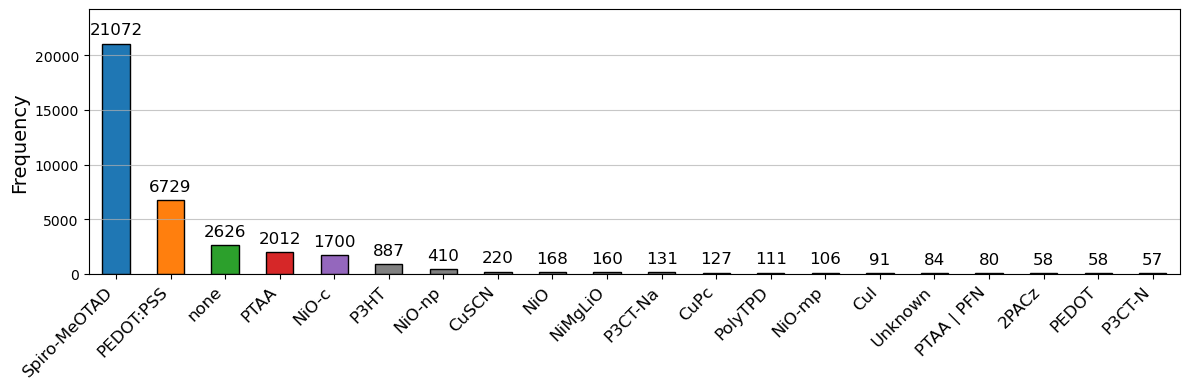

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

top_20_htl = df_all_ctls['htl'].value_counts().head(20)

colors = []
for category in top_20_htl.index:
    if category == ['Spiro-MeOTAD']:
        colors.append('tab:blue')
    elif category == ['PEDOT:PSS']:
        colors.append('tab:orange')
    elif category == ['PTAA']:
        colors.append('tab:red')
    elif category == ['none']:
        colors.append('tab:green')
    elif category == ['NiO-c']:
        colors.append('tab:purple')
    else:
        colors.append('grey')

ax = top_20_htl.plot(kind='bar', figsize=(12, 4), color=colors, edgecolor='black')

ax.set_ylabel('Frequency', fontsize=14)

# Grid
ax.grid(axis='y', alpha=0.7)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=12)


labels = [str(label).replace('[', '') for label in top_20_htl.index]
labels = [str(label).replace('\'', '') for label in labels]
labels = [str(label).replace(']', '') for label in labels]
labels = [str(label).replace(',', ' |') for label in labels]
ax.set_xticklabels(labels, rotation=45)


# Value labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

# Padding    
y_max = top_20_htl.max()
ax.set_ylim(0, y_max + y_max * 0.15)

plt.tight_layout()
plt.show()